# "Análisis y Visualización de Datos Médicos con Python"

🎯Este proyecto tiene como objetivo explorar un conjunto de datos médicos que incluye información sobre medidas corporales, indicadores sanguíneos, hábitos de estilo de vida y presencia de enfermedades cardíacas. A través de técnicas de análisis de datos y visualización, buscamos identificar patrones y relaciones significativas entre estas variables.

📌 Puedes descargar la data para procesar aquí: 👉 https://github.com/WLozanoH/Heart-Disease-Prediction/blob/main/medical_examination.zip

In [103]:
#Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

📌 1. Importamos la data 'medical_examination.csv'

In [104]:
df = pd.read_csv('medical_examination.csv', index_col='id')
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


    sex = sexo(0:mujer, 1: hombre) --modificar valores
    ap_hi = presión arterial sistólica
    ap_lo = presión arterial diastólica
    cholesterol = colesterol
    gluc = glucosa
    smoke = fumador (0:no, 1, yes)
    alco = consumo de alcohol (0:no, 1:yes)
    active = actividad física (0:no, 1:yes)
    cardio = Presencia o ausencia de enfermedades cardiovasculares (0:no, 1:yes)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [106]:
#observando valores en la variable 'sex'
df['sex'].value_counts()

sex
1    45522
2    24467
3       11
Name: count, dtype: int64

In [107]:
#modificando valores para 'sex' (0:mujer, 1: hombre)
# reemplazamos (2,0)
# reemplazamos (3,0)
df['sex'] = df['sex'].replace({2:0, 3:0})

In [108]:
df['sex'].value_counts() #verificamos el reemplazo

sex
1    45522
0    24478
Name: count, dtype: int64

📌 2. para crear la variable sobrepeso 'overweight', necesitamos el IMC(índice de masa corporal)

IMC = peso/(altura(mts)) ^2

In [109]:
#calculando el índice de masa corporal 

#convertimos la altura de cm a mts, dividiendo por 100
df['height_mts'] = df['height']/100
#calculamos el índice de masa corporal(IMC)
df['IMC'] = df['weight'] / (df['height_mts']**2)     #En python la potencia se expresa con **

#Calcular la variable sobrepeso('overweight')
#Según la OMS >25: 1(tiene sobre peso), <25: 0( no tiene sobre peso) 

df['overweight'] = df['IMC'].apply(lambda x: 1 if x > 25 else 0)

In [110]:
#obseramos la cantidad de personas con sobre peso
count_overweight = df['overweight'].value_counts()

#calculamos el porcentaje de personas con sobre peso
percentage_overweight = (df['overweight'].value_counts()/len(df)) * 100

#Mostramos los resultados en un formato claro:
print(f'cantidad de personas con sobrepeso')
print(count_overweight)      
print('------------------------------')
print('Porcentaje de personas con sobrepeso')
for label, porcentage in percentage_overweight.items():
    print(f"{label}: {porcentage:.2f}%")

cantidad de personas con sobrepeso
overweight
1    43546
0    26454
Name: count, dtype: int64
------------------------------
Porcentaje de personas con sobrepeso
1: 62.21%
0: 37.79%


📌 3.- Normalizamos los valores de colesterol y glucosa en categorías binarias (bueno/malo)

    bueno: 0
    malo: 1

Si el valor de colesterol o glucosa es 1, establezca el valor en 0. Si el valor es mayor que 1, establezca el valor en 1.*

In [111]:
df['gluc'].value_counts()

gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64

In [112]:
df['cholesterol'].value_counts()

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

In [113]:
df['cholesterol'] = df['cholesterol'].apply(lambda x:0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x:0 if x == 1 else 1)

In [114]:
print(df['gluc'].value_counts())
print(df['cholesterol'].value_counts())

gluc
0    59479
1    10521
Name: count, dtype: int64
cholesterol
0    52385
1    17615
Name: count, dtype: int64


📌 4. Creamos un gráfico categórico utilizando Seaborn y un gráfico de 'countplot' para mostrar distribuciones clave.

In [115]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'height_mts', 'IMC',
       'overweight'],
      dtype='object')

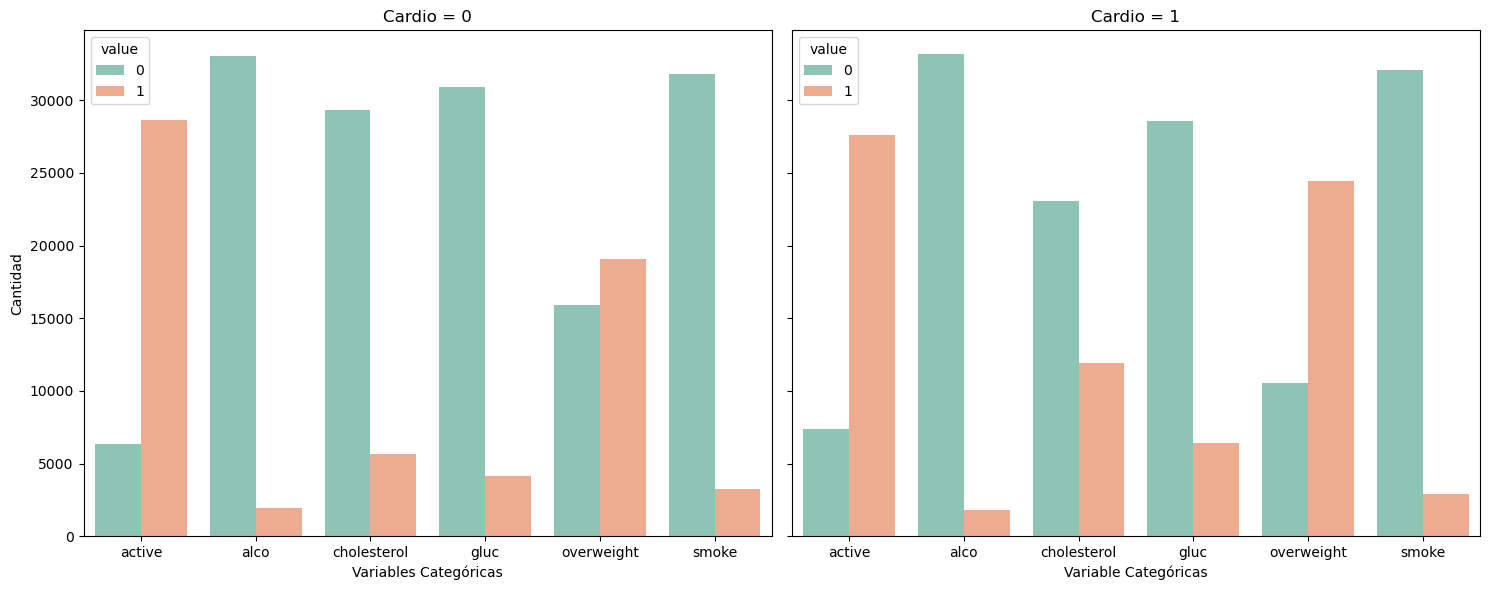

In [116]:
#variables categóricas a analizar 
categorical_vars = ['active','alco','cholesterol','gluc','overweight','smoke']

#convertir los datos a formato long usando 'pd.melt()'
df_long = pd.melt(df, id_vars=['cardio'], value_vars=categorical_vars, 
                  var_name='variable', value_name='value')

#filtramos los datos por cardio
df_cardio_0 = df_long[df_long['cardio']== 0]
df_cardio_1 =df_long[df_long['cardio'] == 1]

#crear dos gráficos: uno para cada grupo de cardio
fig, axes = plt.subplots(1,2, figsize=(15,6), sharey=True)

#creamos gráfico cardio = 0
sns.countplot(data=df_cardio_0, x='variable', hue='value', palette='Set2', ax=axes[0], alpha=0.8)
axes[0].set_title('Cardio = 0')
axes[0].set_xlabel('Variables Categóricas')
axes[0].set_ylabel('Cantidad')

#creamos gráfico cardio = 1
sns.countplot(data=df_cardio_1, x='variable', hue='value', palette='Set2', ax=axes[1], alpha=0.8)
axes[1].set_title('Cardio = 1')
axes[1].set_xlabel('Variable Categóricas')
axes[1].set_ylabel('Cantidad')

#Ajustamos el diseño del gráfico
plt.tight_layout()

#Mostramos el gráfico
plt.show()


📝Conclusiones sobre el gráfico analizado:

✅Sobrepeso y enfermedades cardíacas: Las personas con sobrepeso (overweight = 1) tienen una mayor prevalencia de enfermedades cardíacas (cardio = 1), lo que confirma el sobrepeso como un factor de riesgo significativo.

✅Colesterol y glucosa (malo = 1): En el grupo con enfermedades cardíacas, hay más personas con valores malos de colesterol y glucosa, reforzando que estas condiciones están estrechamente relacionadas con el riesgo cardiovascular.
    
✅Actividad física: La actividad física (active = 1) es más común en el grupo sin enfermedades cardíacas, indicando su rol protector frente a estas enfermedades.

✅Tabaquismo: El tabaquismo (smoke = 1) no muestra una diferencia significativa entre los dos grupos, por lo tanto, 'smoke' en este análisis no muestra una asociación fuerte ni directa con la presencia de enfermedades cardíacas.

En conclusión, los factores de riesgo más destacados son el sobrepeso, valores malos de colesterol/glucosa e inactividad física. Estos deben ser priorizados en estrategias de prevención de enfermedades cardiovasculares.

    

📌 5. Vamos a filtrar segmentos de pacientes que representan datos inconsistentes basados en límites estadísticos y coherencia.

Verificar información:

✔️La presión sistólica es más alta que la diastólica 

✔️La altura es mayor que el percentil 2.5

✔️la altura es menor que el percentil 97.5

✔️El peso es mayor que el percentil 2.5

✔️El peso es menor que el percentil 97.5

    ap_hi = Presión arterial sistólica
    ap_lo = Presión arterial diastólica

In [117]:
print('Antes',df.shape)
#Corrigiendo los datos

#La presión sistólica es más alta que la diastólica
df = df[df['ap_hi'] >= df['ap_lo']]
print(df.shape)

#La altura es mayor que el percentil 2.5
df = df[df['height'] >= df['height'].quantile(0.025)]
print(df.shape)

#la altura es menor que el percentil 97.5
df = df[df['height'] <= df['height'].quantile(0.975)]
print(df.shape)

# El peso es mayor que el percentil 2.5
df = df[df['weight'] >= df['weight'].quantile(0.025)]
print(df.shape)

# El peso es menor que el percentil 97.5
df = df[df['weight'] <= df['weight'].quantile(0.975)]

print(f'Después',df.shape)

Antes (70000, 15)
(68766, 15)
(67260, 15)
(65859, 15)
(64384, 15)
Después (62784, 15)


In [120]:
#Eliminamos las variables: 'height_mts','IMC'
print(df.shape)
df = df.drop(columns=['height_mts','IMC'])
print(df.shape)

(62784, 15)
(62784, 13)


📌 6.  Generamos una matriz de correlación visualizada con un mapa de calor para identificar la relaciones entre las variables.

    Usando 'heatmap' y enmascarando el tríangulo superior del mapa de calor usando 'numpy'

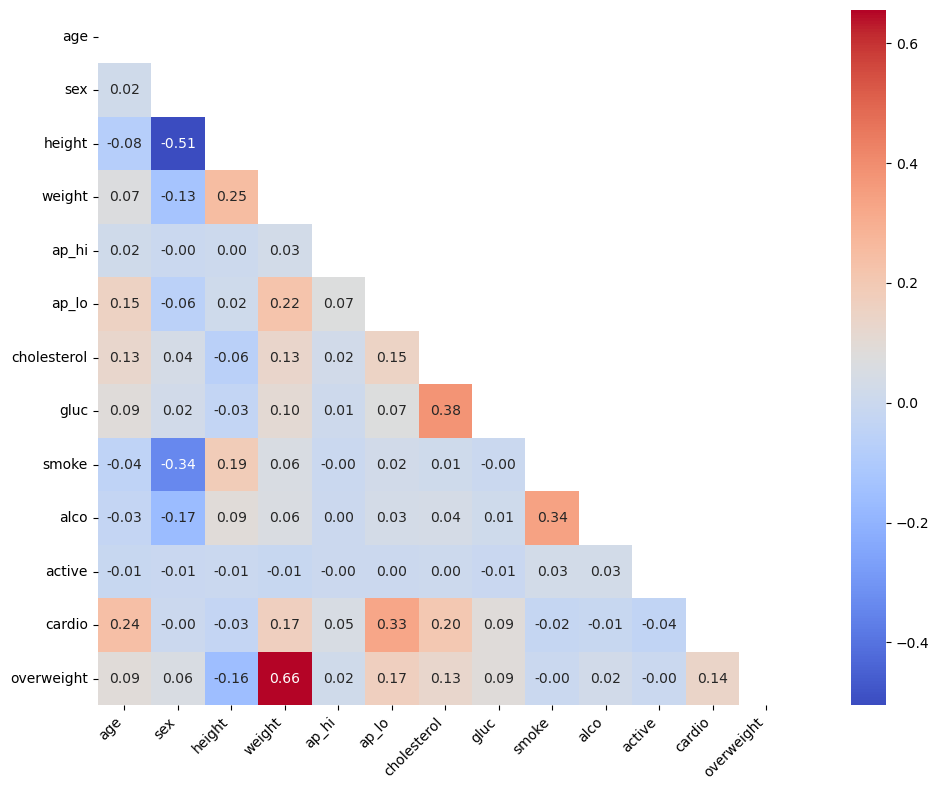

In [125]:
#Creando un dataframe para el mapa de calor
df_heat = df

#crear la matriz de correlación 
correlación = df_heat.corr()

# crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(correlación, dtype = bool)) #np.triu para el triangulo superior, np.ones_like que complete con '1'

#características del gráfico
plt.figure(figsize=(12,8))

#graficando el mapa de calor
sns.heatmap(correlación, mask=mask, annot=True, cmap='coolwarm', square=True, fmt='.2f')


#rotamos las etiquetas del eje x para que se vean correctamente
plt.xticks(rotation = 45, ha = 'right')   #Alinear etiquetas del eje x 45° a la derecha

#Ajustamos el diseño del gráfico y mostramos
plt.tight_layout()
plt.show()

    En resumen, el mapa de calor proporciona una visualización clara de las relaciones entre las variables, destacando el peso y el colesterol como los factores con mayor influencia en la salud cardiovascular, mientras que otros factores como sexo y actividad física muestran relaciones más débiles con las enfermedades cardíacas en este conjunto de datos.

## Resumen del Proyecto:

✅ Preprocesamiento y Limpieza de Datos:

Calcular el IMC para clasificar pacientes con sobrepeso.
Normalizar los valores de colesterol y glucosa en categorías binarias (bueno/malo).
Filtrar datos inconsistentes basados en límites estadísticos y coherencia.

✅ Análisis Exploratorio:

Comparar características categóricas (como colesterol, glucosa, fumar, alcohol) entre pacientes con y sin enfermedades cardíacas.
Examinar correlaciones entre las variables para detectar patrones significativos.

✅ Visualización de Datos:

Crear gráficos categóricos utilizando Seaborn para mostrar distribuciones clave.
Generar una matriz de correlación visualizada con un mapa de calor para identificar relaciones entre las variables.

✅ Tecnologías Utilizadas:

Python: Pandas, Matplotlib, Seaborn.
Este proyecto combina análisis estadístico y visualización para comprender mejor los factores que influyen en las enfermedades cardíacas, destacando cómo los hábitos y medidas corporales afectan la salud.